In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import pylab
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

df = pd.read_csv(r"C:\Users\nstow\Desktop\Python\winequality-red.csv")

## Exploring the Data

In [2]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## Choosing Variables for Examination
Our Key variable is Quality since this is what would be most important to the consumer when choosing a wine. So, we will first look at which variables are most closely correlated with Quality.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

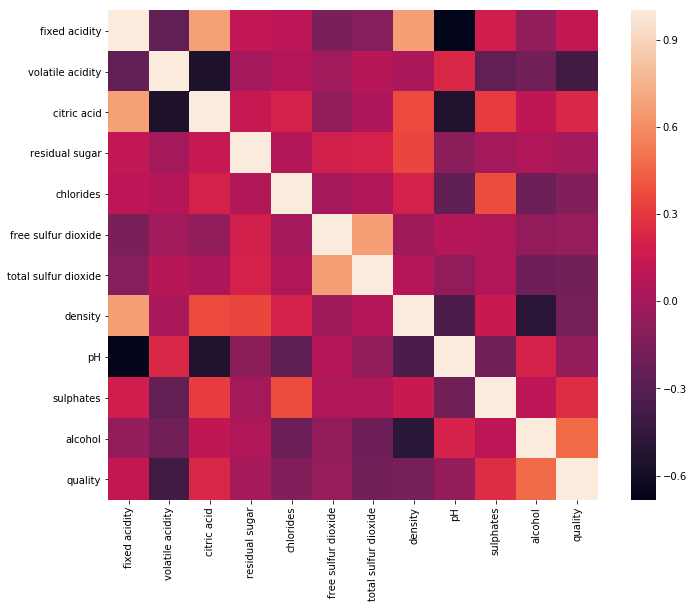

In [6]:
corrmat = df.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True)
plt.show()

We can see from this data that Citric Acid, Volitile Acidity, Sulphates and Alcohol have the highest (positive or negative) correlations with Quality. We will explore these further

   ## Citric Acid (Continuous Variable)

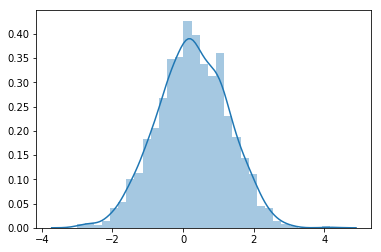

In [8]:
x = np.random.normal(df['citric acid'])
sns.distplot(x);

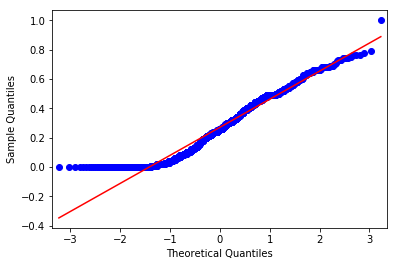

In [9]:
sm.qqplot(df['citric acid'], line = 'r')
pylab.show()

There are 1599 data points with a standard deviation of 0.194801. There is no missing data and it is not normally distributed

## Volatile Acidity (Continuous Variable)

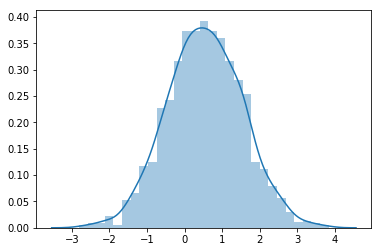

In [10]:
x = np.random.normal(df['volatile acidity'])
sns.distplot(x);

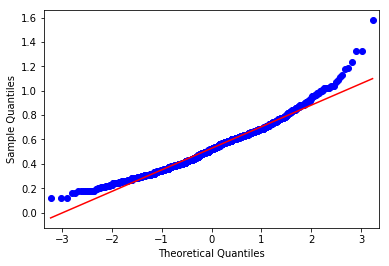

In [11]:
sm.qqplot(df['volatile acidity'], line = 'r')
pylab.show()

There are 1599 data points with a standard deviation of 0.179060. There is no missing data and it is not normally distributed

## Sulphates (Continuous Variable)

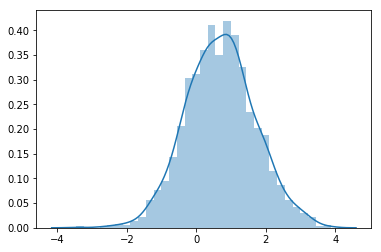

In [12]:
x = np.random.normal(df['sulphates'])
sns.distplot(x);

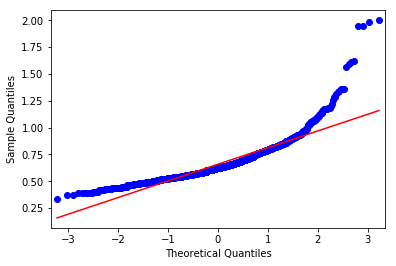

In [13]:
sm.qqplot(df['sulphates'], line = 'r')
pylab.show()

There are 1599 data points with a standard deviation of 0.169507. There is no missing data and it is not normally distributed

## Alcohol (Continuous Variable)

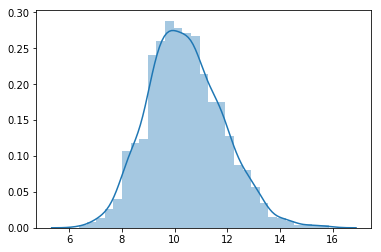

In [14]:
x = np.random.normal(df['alcohol'])
sns.distplot(x);

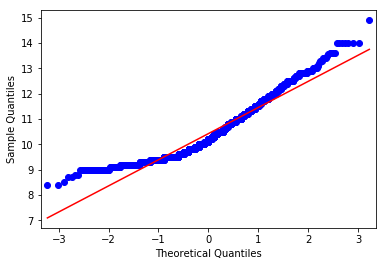

In [15]:
sm.qqplot(df['alcohol'], line='r')
pylab.show()

There are 1599 data points with a standard deviation of 1.065668. There is no missing data and it is not normally distributed

## Quality (Categorical Variable)

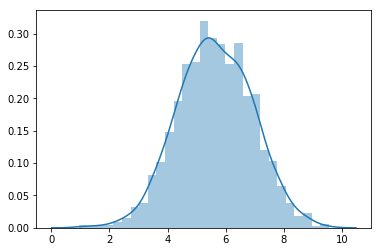

In [20]:
x = np.random.normal(df['quality'])
sns.distplot(x);

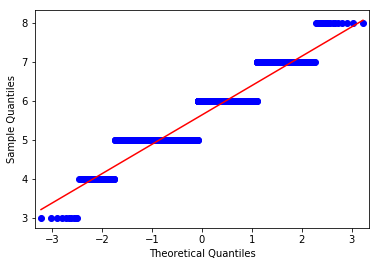

In [23]:
sm.qqplot(df['quality'], line='r')
pylab.show()

There are 1599 data points with a standard deviation of 0.807569. There is no missing data and it is not normally distributed

## Bivariate Analysis
We will look at only the variables that we noted above

In [4]:
dfJitter = df.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH'], axis = 1)

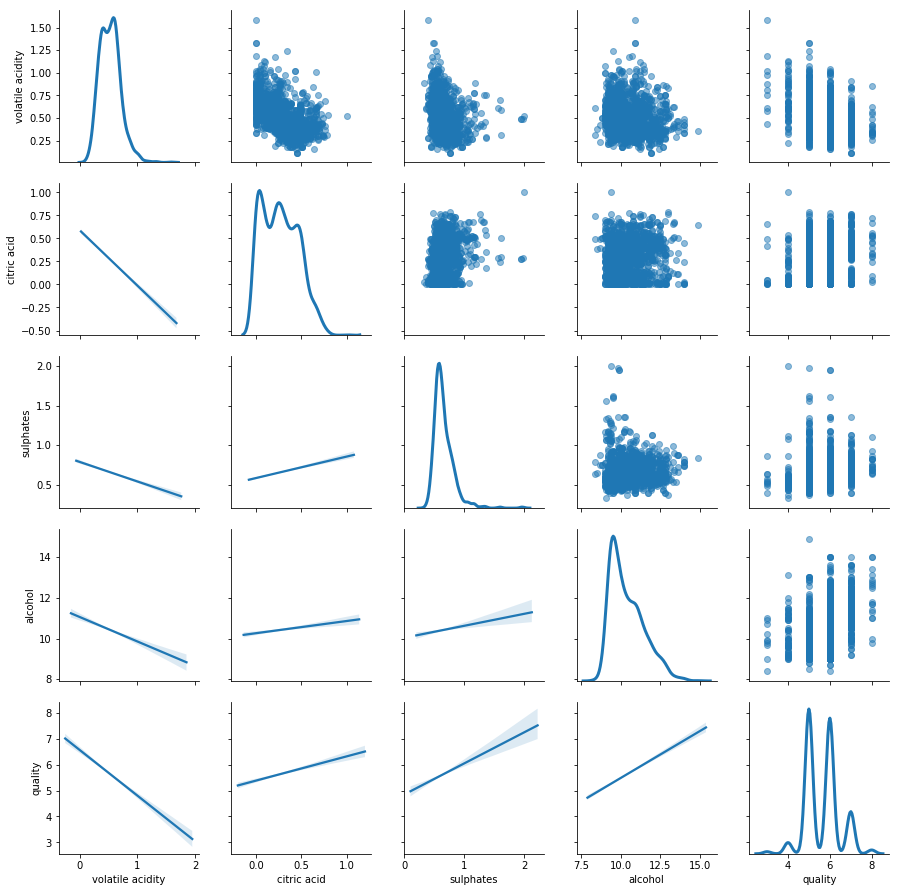

In [6]:
g = sns.PairGrid(dfJitter, diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()

                  volatile acidity  citric acid  sulphates   alcohol   quality
volatile acidity          1.000000    -0.552496  -0.260987 -0.202288 -0.390558
citric acid              -0.552496     1.000000   0.312770  0.109903  0.226373
sulphates                -0.260987     0.312770   1.000000  0.093595  0.251397
alcohol                  -0.202288     0.109903   0.093595  1.000000  0.476166
quality                  -0.390558     0.226373   0.251397  0.476166  1.000000


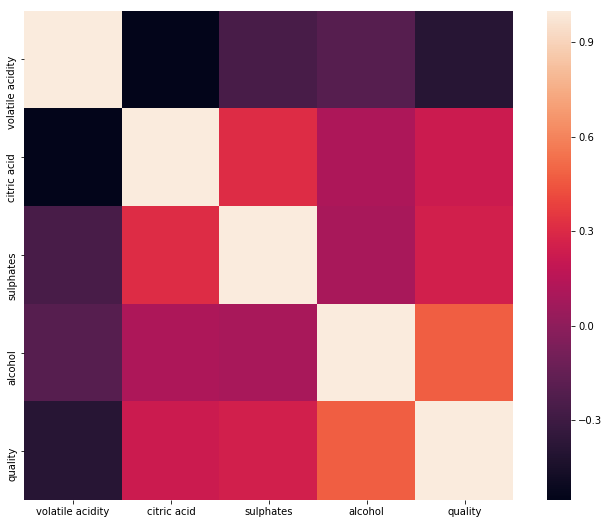

In [8]:
corrmat = dfJitter.corr()
print(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)
plt.show()

We can see that the variable with the highest positive correlation are Sulphates and Citric Acid, as well as Alcohol and Citric Acid. We will start with these to create new features.

## New Feature Creation

### Sulphates and Citric Acid Combined
We will find the highest value for Sulphates and Citric Acid. To create our new feature we will add the values of Sulphates and Citric Acid from each row and divide by the sum of the max value so we can compare which have the highest and lowest possible concentration of both.

In [9]:
print(df['sulphates'].max())
print(df['citric acid'].max())

2.0
1.0


In [10]:
df['S-CA'] = (df['sulphates'] + df['citric acid'])/3

### Alcohol and Citric Acid Combined
We will now do the same for Alcohol and Citric Acid

In [11]:
print(df['alcohol'].max())
print(df['citric acid'].max())

14.9
1.0


In [12]:
df['A-CA'] = (df['alcohol'] + df['citric acid'])/15.9

### Sulphates, Alcohol and Citric Acid Combined
Now we will look at all three combine since Citric Acid appears in both of the new features

In [13]:
df['S-CA-A'] = (df['sulphates'] + df['citric acid'] + df['alcohol'])/17.9

### Volatile Acidity and Citric Acid Combine
These two have a highere negative correlation so we will combine them to make a new feature. We will do it in the same way as the other features.

In [15]:
print(df['volatile acidity'].max())
print(df['citric acid'].max())

1.58
1.0


In [16]:
df['VA-CA'] = (df['volatile acidity'] + df['citric acid'])/2.58

### Volatile Acidity and Sulphates Combine
These two also have a high negative correlation, so we will combine them in the same way

In [17]:
print(df['volatile acidity'].max())
print(df['sulphates'].max())

1.58
2.0


In [18]:
df['VA-S'] = (df['volatile acidity'] + df['sulphates'])/3.58

### Volatile Acidity and Alcohol Combine
This is another higher negative correlation

In [20]:
print(df['volatile acidity'].max())
print(df['alcohol'].max())

1.58
14.9


In [24]:
df['VA-A'] = (df['volatile acidity'] + df['alcohol'])/16.48

### Volatile Acidity, Citric Acid, Alcohol and Sulphates Combine
We will now combine all of the variable that have a high negative correlation with Volatile Acidity.

In [25]:
print(df['volatile acidity'].max())
print(df['citric acid'].max())
print(df['sulphates'].max())
print(df['alcohol'].max())

1.58
1.0
2.0
14.9


In [26]:
df['VA-CA-S-A'] = (df['volatile acidity'] + df['citric acid'] + df['sulphates'] + df['alcohol'])/19.48

### High Alcohol
Since Alcohol has the highest positive correlation with Quality, we will mark the ones that are of high quality in a Categorical Feature. We will define high alcohol as those wines that fall into the 75% quartile.

In [27]:
df['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [28]:
df['high alcohol'] = np.where(df['alcohol'] >= 11.1, 1, 0)

### Low Volatile Acidity
Volatile Acidity has a strong negative correlation with Quality so we will mark the wines that have a low value for Volatile Acidity in the form of a Categorical Feature. We will define low volatile Acidity as those in the 25% quartile.

In [30]:
df['volatile acidity'].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [31]:
df['low volatile acidity'] = np.where(df['volatile acidity'] <= 0.39, 1, 0)

### High Quality
High Quality is the most important factor when the consumer chooses a wine, so we will mark those wines as a Categorical Feature.

In [32]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [33]:
df['high quality'] = np.where(df['quality'] >= 6, 1, 0)

## Feature Selection
We will now look at the variance of each of our features and choose the five with highest values.

In [35]:
print('Sulphates and Citric Acid:',df['S-CA'].var())
print('Alcohol and Citric Acid:',df['A-CA'].var())
print('Alcohol, Sulphates and Citric Acid:',df['S-CA-A'].var())
print('Volatile Acidity and Citric Acid:',df['VA-CA'].var())
print('Volatile Acidity and Sulphates:',df['VA-S'].var())
print('Volatile Acidity and Alcohol:',df['VA-A'].var())
print('Volatile Acidity, Citric Acid, Sulphates and Alcohol:',df['VA-CA-S-A'].var())
print('High Alcohol:',df['high alcohol'].var())
print('Low Volatile Acidity:',df['low volatile acidity'].var())
print('High Quality:',df['high quality'].var())

Sulphates and Citric Acid: 0.009703947589618704
Alcohol and Citric Acid: 0.004822693817467793
Alcohol, Sulphates and Citric Acid: 0.004064875701859276
Volatile Acidity and Citric Acid: 0.004727272885346058
Volatile Acidity and Sulphates: 0.0035073910063778053
Volatile Acidity and Alcohol: 0.0040152720044256225
Volatile Acidity, Citric Acid, Sulphates and Alcohol: 0.003169951198259206
High Alcohol: 0.18986522396272387
Low Volatile Acidity: 0.1895576161884657
High Quality: 0.24895096356374175


The five new features based on variance are High Quality, High Alcohol, Low Volatile Acidity, Alcohol and Citric Acid and Volatile Acidity and Alcohol